# RNA-seq analysis
Based on: Quantitative Methods Workshop (MIT, Jan, 2023)

Originally by Giselle Valdes and Julian Stanley

Modified by Lia Qiu (Feb, 2023)

## Part 1: Bulk RNA-Seq from M1 and M2 Macrophages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# Set Plotting Presets
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams.update({'font.size': 14})

# Here's the URL where I uploaded the data we'll be working with
bulkRNAseq_file_location = 'https://raw.githubusercontent.com/julianstanley/QMW2023_BulkRNASeq/main/data/simplified_data_He2021.csv'
bulkRNAseq_file_location_advanced = 'https://raw.githubusercontent.com/julianstanley/QMW2023_BulkRNASeq/main/data/full_data_S4_He2021.csv'

### Part 1a: Load and view data

In [2]:
# read data
x = pd.read_csv(bulkRNAseq_file_location)
x.head()

,Gene,immature,A,B
0,TSPAN6,0.070621,0.106641,0.162144
1,TNMD,0.000000,0.000000,0.000000
2,DPM1,20.280869,21.577955,24.723890
3,SCYL3,1.498799,3.859121,1.867398
4,C1orf112,1.032787,1.513904,1.707875


You should see four columns: "Gene", "immature", "A", and "B".

The "Gene" column is the gene of the RNA being quantified.

The other columns are all FPKM-normalized RNA counts.

* Immature are also called "M0" macrophages. These are RNA counts for early, undeveloped macrophages.

"A" and "B" correspond to either M1 or M2 macrophages, but we can't remember which one goes with which. Next, we'll figure that out. 

Just remember that:
* M1 macrophages (generally) activate inflammation.
* M2 macrophages (generally) suppress inflammation.

### Part 1b: Plot M1 and M2 markers to determine the identify of samples A and B.

Let's figure out which of "A" and "B" are M1 or M2 macrophages.

M1 and M2 cells have unique, so-called _marker_ genes. These are genes that have high RNA gene expression in each cell type under most conditions, so we can use them to identify these cells. 

The first gene is "PPARG", which _suppresses_ the production of pro-inflammatory 
compounds. 

**PPARG is a marker of anti-inflammatory, M2 macrophages**. That is, PPARG will have the highest RNA level in M2 macrophages. 

The second gene is "CCR7", which leads to the activation of other immune cells.


**CCR7 is a marker of pro-inflammatory, M1 macrophages**. That is, CCR7 will have the highest RNA level in M1 macrophages. 

In [4]:
interest_genes = ['PPARG', 'CCR7']
x_filtered = x[x['Gene'].isin(interest_genes)]
x_filtered

,Gene,immature,A,B
5868,CCR7,1.724602,128.391052,2.396366
6608,PPARG,37.502964,6.706289,81.222435


Use `.head()` to view the first few rows of `genes_of_interest_fpkm`

In [9]:
x_filtered.head()
x.shape
x_filtered.shape

(2, 4)

Transform into a long (tidy) table

| Gene  | Cell Type | FPKM       |
|-------|-----------|------------|
|  CCR7 |  immature |   1.724602 |
| PPARG |  immature |  37.502964 |
|  CCR7 |         A | 128.391052 |
| PPARG |         A |   6.706289 |
|  CCR7 |         B |   2.396366 |
| PPARG |         B |  81.222435 |

You can do this by hand, or with various round-about coding tricks (which is what I did for years), but there's a function called `.melt()` that can do it for you. 

I'll provide you that code below, which uses the "Gene" column as a label, then turns the other columns into a new column called "Cell Type", and matches them with their values in a column called "FPKM".

Rearranging data like this is often called "tidying" the data, named in a [2014 paper](http://vita.had.co.nz/papers/tidy-data.pdf) from the data visualization mastermind (and head programmer for RStudio) Hadley Wickham.

In [11]:
x_filtered_long = x_filtered.melt(id_vars = ["Gene"], var_name = "Cell Type", value_name = "FPKM")
x_filtered_long

,Gene,Cell Type,FPKM
0,CCR7,immature,1.724602
1,PPARG,immature,37.502964
2,CCR7,A,128.391052
3,PPARG,A,6.706289
4,CCR7,B,2.396366
5,PPARG,B,81.222435


Print out `genes_of_interest_fpkm_tidy` to make sure it looks as expected

Now, make a plot using `sns.barplot()`. Use the following arguments:
* `data = genes_of_interest_fpkm_tidy`
* `x = "Gene"`
* `y = "FPKM"`
* `hue = "Cell Type"`

<AxesSubplot: xlabel='Gene', ylabel='FPKM'>

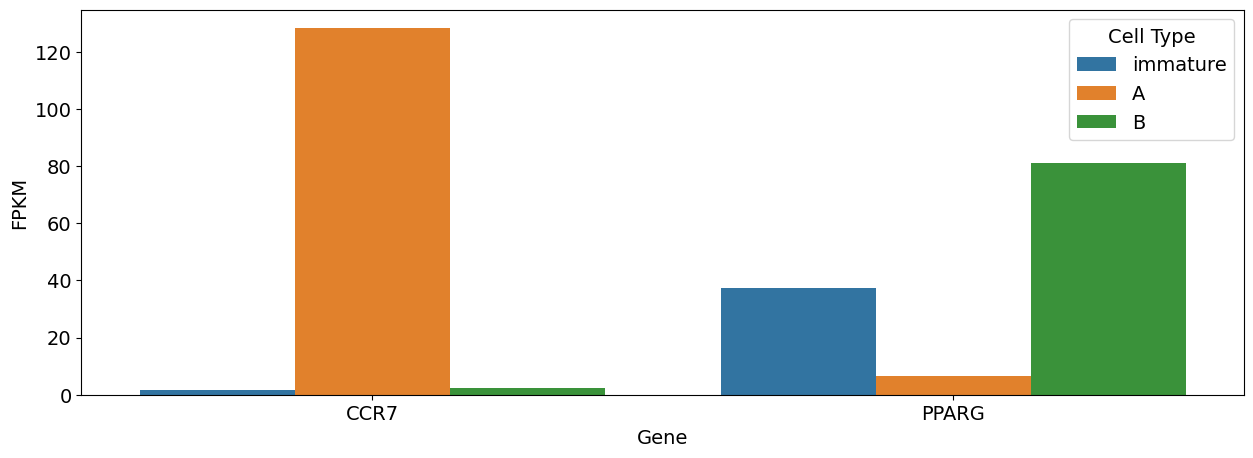

In [12]:
sns.barplot(data = x_filtered_long, x = "Gene", y = "FPKM", hue = "Cell Type")

<AxesSubplot: xlabel='Cell Type', ylabel='FPKM'>

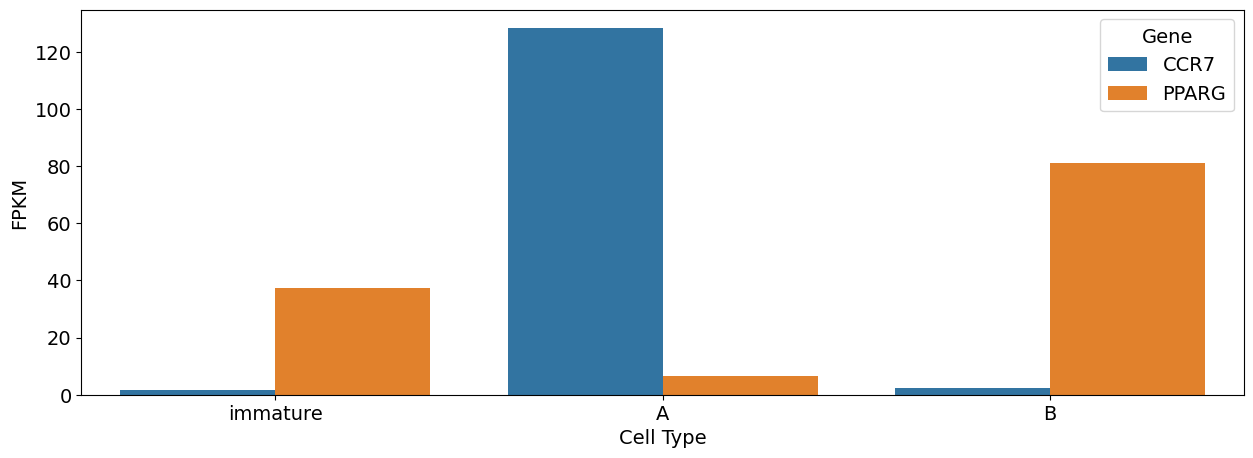

In [13]:
sns.barplot(data=x_filtered_long, x="Cell Type", y="FPKM", hue="Gene")

Which sample, "A" or "B", corresponds to M1 macrophages? M2?

### Part 1c: Histograms and log transformations

To do most analyses of RNA data, you need to log transform the read-and-length-normalized RNA expression levels. 

This is because many statistical analyses assume that the data is normally-distributed. Most sequencing data is [log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution), meaning that it isn't usually normally distributed, but if you take the log of all the data, it's approximately normal. 

Here are a few exercises to demonstrate that.

------------------

Plot a histogram of the FPKM values for one of the 3 samples. 

Use the plt.hist() function

(array([6.371e+04, 9.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0.      ,  2785.735742,  5571.471484,  8357.207226,
        11142.942968, 13928.67871 , 16714.414452, 19500.150194,
        22285.885936, 25071.621678, 27857.35742 ]),
 <BarContainer object of 10 artists>)

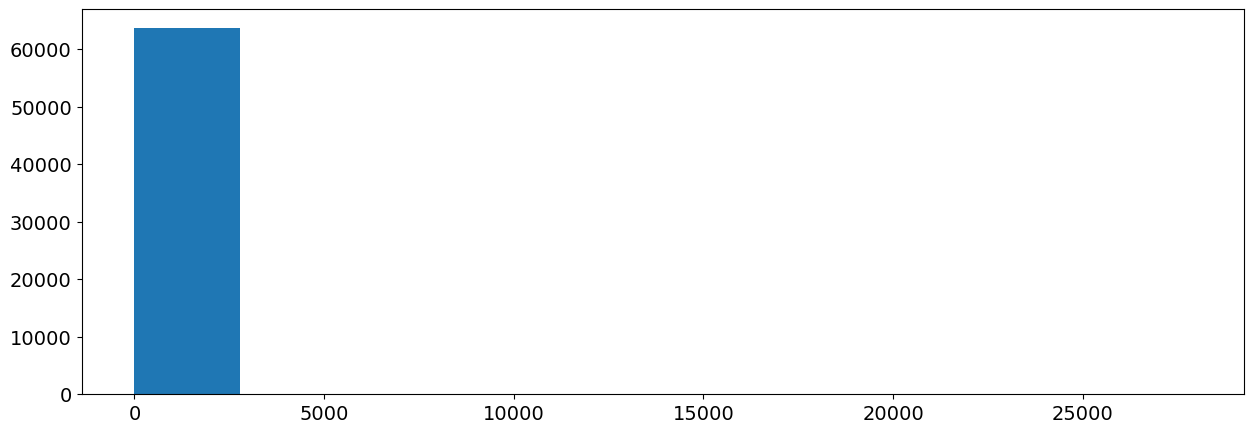

In [14]:
plt.hist(x['immature'])

<AxesSubplot: >

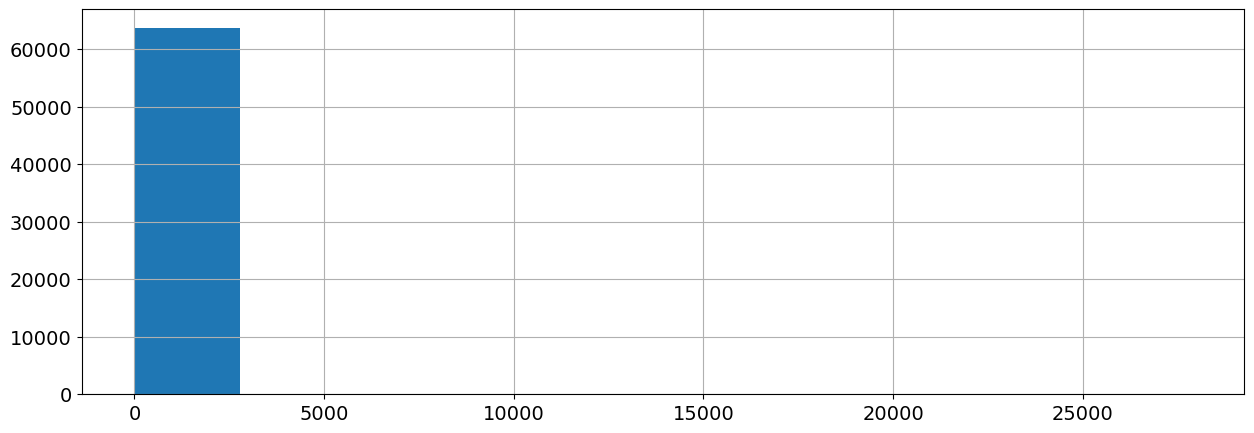

In [15]:
x['immature'].hist()

**Does this data look normally distributed?**

Try log-transforming that same data before you plot the histogram.

(To log-transform an entire column, see the `np.log` function)

(array([5.2116e+04, 4.2020e+03, 3.9900e+03, 2.2470e+03, 7.8400e+02,
        2.7700e+02, 6.8000e+01, 2.8000e+01, 8.0000e+00, 1.0000e+00]),
 array([ 0.        ,  1.02348883,  2.04697766,  3.07046649,  4.09395531,
         5.11744414,  6.14093297,  7.1644218 ,  8.18791063,  9.21139946,
        10.23488829]),
 <BarContainer object of 10 artists>)

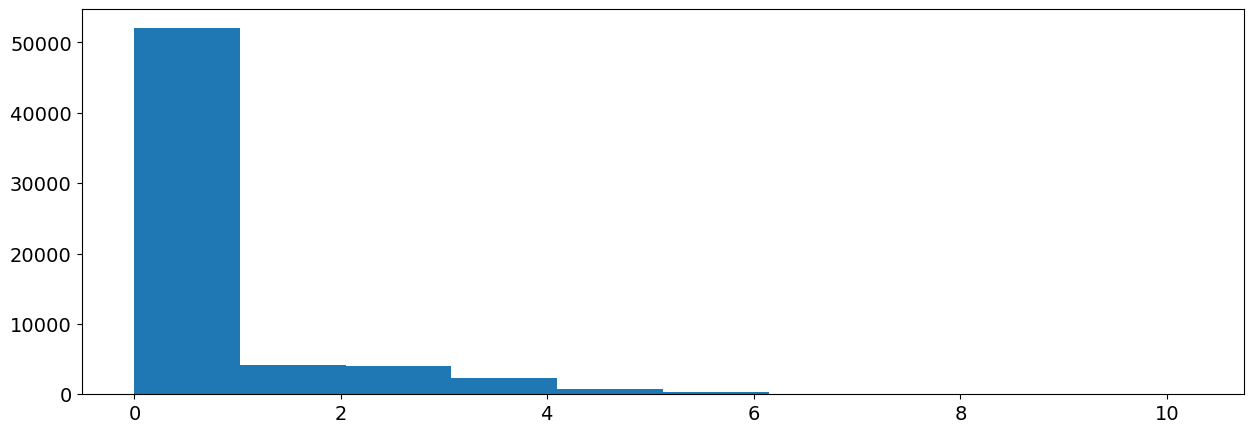

In [16]:
# Warning: this should give an error
plt.hist(np.log(x['immature']+1))

You should get a "ValueError: supplied range ... is not finite". 

**What is causing that error?**

It's common to add "1" to all values in RNA-seq data so that no values are equal to 0. Since you're adding the same value to every sample, this doesn't make a big difference in later analyses.

Adding 1 is called adding a _pseudocount_

----------

Plot the histogram again, this time using `macrophage_fpkm["sample"] + 1` to add a pseudocount to each cell.

**Does this data look normally distributed?**

Oftentimes, RNA-seq data is very sparse -- that is, many FPKM values are "0".

In these cases, sometimes it's beneficial to filter out genes that were not detected in any sample: a common cuttoff is an FPKM of "1" in at least one sample (that is, one sample must have at least 1 mRNA molecule for a given gene, if they had 1 million mRNA molecules total).

----------

Filter `macrophage_fpkm` so that genes must have at least 1 sample with an FPKM greater than 1. 

Name the new table `macrophage_fpkm_filter1`

Filtering like this can be tricky sometimes (the parentheses are important!) so I'll provide the code below:

In [17]:
x_filter1 = x[(x['immature'] >= 1) & (x['A'] >= 1) & (x['B'] >= 1)]

How many rows did you filter out? Use the `.shape` attribute (e.g., `macrophage_fpkm.shape`) to see how many rows are in `macrophage_fpkm` and `macrophage_fpkm_filter1`.

In [18]:
print(x_filter1.shape)
print(x.shape)

(11794, 4)
(63721, 4)


<AxesSubplot: >

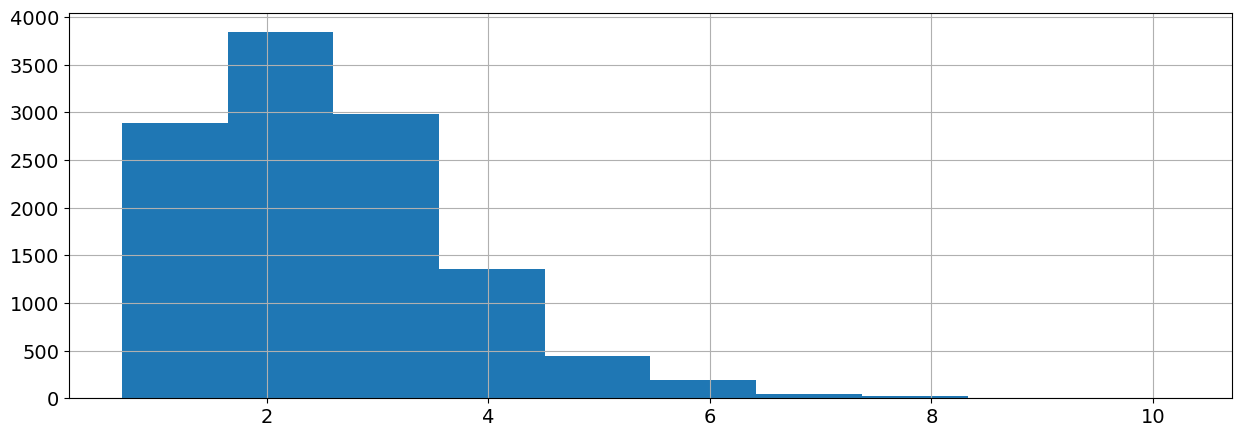

In [19]:
np.log(x_filter1['immature']+1).hist()

Re-plot your histogram, with pseucounts and a log transform, with the new, `macrophage_fpkm_filter1` data.

This now looks close to a normal distribution, with a bit of a right skew. This should be close-enough to normal for most statistical analyses. 

Finally, create a variable called `macrophage_fpkm_filter1_log` in which all three sample columns have pseudocounts and are log-transformed.

In [21]:
from IPython.core import macro
x_filter1_log = pd.DataFrame().assign(Gene = x_filter1['Gene'], A = np.log(x_filter1['A'] + 1), B = np.log(x_filter1['B'] + 1), immature = np.log(x_filter1['immature']+1))

In [22]:
x_filter1_log.head()

,Gene,A,B,immature
2,DPM1,3.116974,3.247420,3.057809
3,SCYL3,1.580858,1.053405,0.915810
4,C1orf112,0.921837,0.996164,0.709408
5,FGR,5.670384,6.200391,6.530200
7,FUCA2,3.922952,3.875431,3.678074


### Part 1d: Analyzing the effect of drugs

One of the main purposes of the [He 2021](https://doi.org/10.1016/j.celrep.2021.109955) paper that this data comes from is to analyze the effect of two drugs that might block M2 development, abbreviated PANO and TRAM.

So, they treat cells with PANO and TRAM. They also treat the cells with DMSO, as a control, since DMSO shouldn't affect M2 development.

In the `bulkRNAseq_file_location_advanced` file, I provide their data from supplementary figure S4. I only made a couple changes: I included only one replicate (the real data includes two replicates that you'd need to average) and I deleted one of the columns (that contains alternative gene IDs).

Let's load that data:

In [24]:
y = pd.read_csv(bulkRNAseq_file_location_advanced)
y.head()

,Gene,DMSO_CT_1,PANO_CT_1,TRAM_CT_1,DMSO_M1_1,PANO_M1_1,TRAM_M1_1,DMSO_M2_1,PANO_M2_1,TRAM_M2_1
0,TSPAN6,0.070621,0.832867,0.000000,0.106641,0.599804,0.000000,0.162144,0.523597,0.000000
1,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,DPM1,20.280869,27.155102,18.863300,21.577955,27.842688,21.512148,24.723890,33.845272,22.435507
3,SCYL3,1.498799,1.940552,1.196571,3.859121,3.145028,3.128950,1.867398,1.815601,1.158582
4,C1orf112,1.032787,2.514149,0.399471,1.513904,0.796930,0.588822,1.707875,1.738136,0.524318


Now that the data is loaded, we can filter to only include M2 columns:

In [25]:
y_M2 = y[["Gene", "DMSO_M2_1", "PANO_M2_1", "TRAM_M2_1"]]

In Figure S10A (found in [this PDF](https://www.cell.com/cms/10.1016/j.celrep.2021.109955/attachment/ff2a1de1-d419-4bf7-9df2-1ec29a4b757b/mmc1), page 16 on the right side) the authors include genes that change in macrophages after PANO or TRAM treatment.

Some of these genes are genes that are known to be important to M2 development (this is important, because that suggests that those drugs could be used to treat cancer, since too many M2 macrophages can promote cancer growth).

These genes include:
* IL1B
* PDGFB
* ICAM1
* MYC


First, filter the dataset for one of these genes:

In [26]:
y_interest = y_M2[y_M2["Gene"].isin(["IL1B", 'PDGFB', 'ICAM1', 'MYC'])]

In [27]:
y_interest

,Gene,DMSO_M2_1,PANO_M2_1,TRAM_M2_1
1891,ICAM1,48.538895,23.557663,46.717220
2281,PDGFB,5.328666,0.828737,4.852240
5725,IL1B,0.000000,4.638537,0.044700
7462,MYC,5.798793,2.326534,2.294883


Now, modify the code to tidy the data and create a `sns.barplot`, just like we did Part 1b.

In [33]:
y_interest_long = y_interest.melt(id_vars = ["Gene"], var_name = "Treatment", value_name = "FPKM")

In [29]:
y_interest_long.head()

,Gene,Cell Type,FPKM
0,ICAM1,DMSO_M2_1,48.538895
1,PDGFB,DMSO_M2_1,5.328666
2,IL1B,DMSO_M2_1,0.000000
3,MYC,DMSO_M2_1,5.798793
4,ICAM1,PANO_M2_1,23.557663


In [30]:
y_interest_long.shape

(12, 3)

<AxesSubplot: xlabel='Treatment', ylabel='FPKM'>

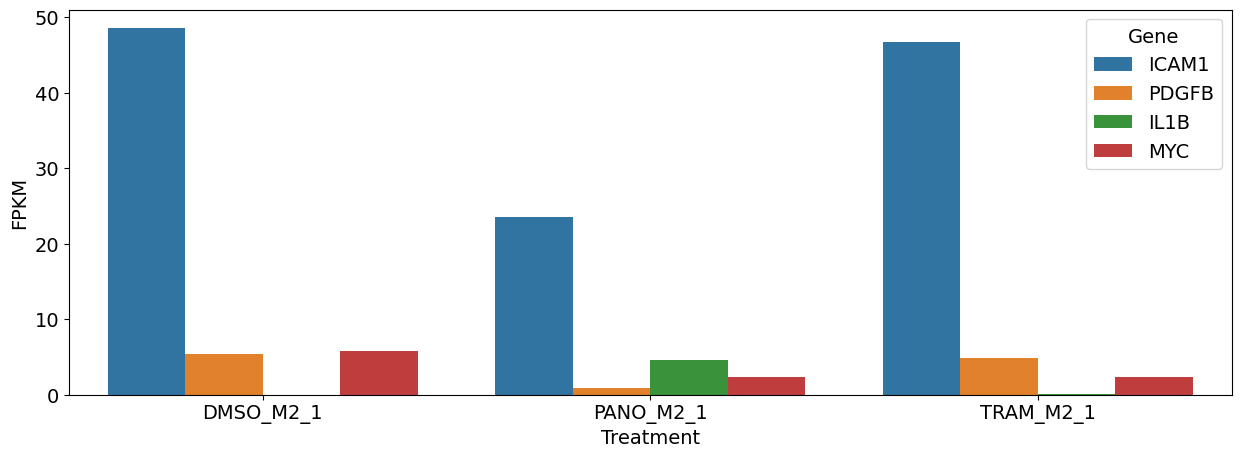

In [34]:
sns.barplot(data = y_interest_long, x = 'Treatment', y = 'FPKM', hue = 'Gene')

<AxesSubplot: xlabel='Gene', ylabel='FPKM'>

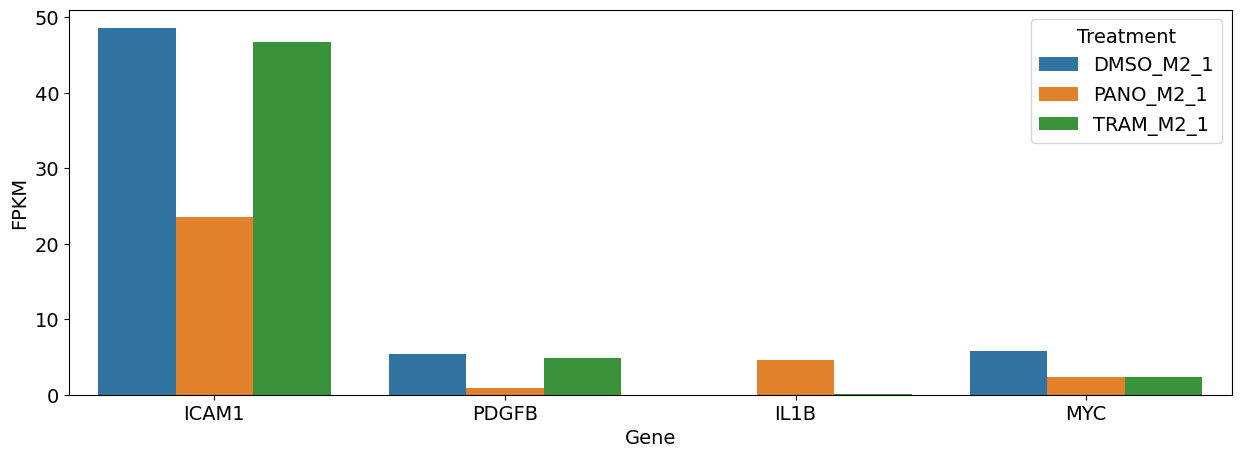

In [35]:
sns.barplot(data = y_interest_long, x = 'Gene', y = 'FPKM', hue = 'Treatment')

Describe the effects that you observe. Repeat this process with the other three genes.

Also repeat the process with one gene that you think should have no effect on M2 polarization (good genes to check here are [Housekeeping genes](https://en.wikipedia.org/wiki/Housekeeping_gene), which are known to not change too much between conditions. A good one to start is "ILF2")

If you have extra time: can you create a single plot that includes all 4/5 genes of interest?

### Part 1e: Download the original data

Still have extra time? Play around with different genes found in the [supplementary information](https://www.cell.com/cms/10.1016/j.celrep.2021.109955/attachment/ff2a1de1-d419-4bf7-9df2-1ec29a4b757b/mmc1), or download the data yourself, Table S4 in the "Supplementary Data" section [here](https://doi.org/10.1016/j.celrep.2021.109955) and try to take the mean of each sample replicate and recreate some of the paper's analyses.

## Part 2: Analyzing Single-Cell Gene Expression to Identify Cell Type Clusters
Written by Giselle Valdes

### Introduction to the Exercise

We hypothesize that we can detect different types of peripheral blood mononuclear cells using single-cell RNA-Seq.

You will start with normalized expression values of the most variable genes in a population of peripheral blood mononuclear cells, and will work through the following steps:

1. Transform the normalized expression values.
2. Use PCA and UMAP to reduce dimensionality and visualize.
3. Use kmeans clustering to cluster cells based on gene expression profiles.
4. Find highly expressed genes within clusters
5. Visualize gene expression within your dataset


### 2a. Loading and Transforming the Normalized PBMC Dataset

In [3]:
#set up environment
import pandas as pd
import numpy as np
import seaborn as sns

#load normalized data
file = 'https://raw.githubusercontent.com/gval38/PBMC_dataset/main/pbmcs.txt'
A_table = pd.read_csv(file, sep='\t', header=0, index_col=0)
#print(A_table.shape)
#A_table.head()

#log transform data
A_log=np.log(A_table+1)

What do the rows and column of our log transformed table, A_log, represent? 

Hint: It might be helpful to visualize the head of the data, as you did previously.

In [4]:
#Visalize the first 5 rows of data
A_log.head()

,TNFRSF4,CPSF3L,ATAD3C,C1orf86,RER1,TNFRSF25,TNFRSF9,CTNNBIP1,SRM,UBIAD1,...,DSCR3,BRWD1,BACE2,SIK1,C21orf33,ICOSLG,SUMO3,SLC19A1,S100B,PRMT2
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.000000,2.226555,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,1.111715,0.000000,0.0,0.000000,0.0,0.0,...,0.0,1.111715,0.0,0.0,1.111715,0.0,0.000000,0.0,0.0,0.000000
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,1.429744,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.429744
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,1.566387,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.566387,0.0,1.566387,0.0,0.0,0.000000
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,2.416278,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [5]:
A_log.shape

(2638, 1838)

### 2b-1. Dimensionality Reduction with PCA

In [6]:
#Run PCA on the transformed data to reduce dimensions
# Install scikit-learn: pip3 install -U scikit-learn
from sklearn.decomposition import PCA
PCA = PCA(n_components=50)
PCA.fit(A_log) #find PCs for data
A_pca = PCA.transform(A_log)# applies PCs to data (projects data points onto PCs)


In [7]:
PCA.explained_variance_

array([36.72186102, 14.35346739,  9.63437988,  4.74759914,  2.99081193,
        2.74813881,  2.39372569,  1.67079972,  1.56149546,  1.48584486,
        1.45669599,  1.43117208,  1.41504278,  1.38669343,  1.36804499,
        1.35840527,  1.35078746,  1.32923548,  1.30614011,  1.29244694,
        1.27767425,  1.27061701,  1.25779057,  1.25182825,  1.2408718 ,
        1.22554896,  1.21529189,  1.21132251,  1.18992659,  1.17631732,
        1.16947222,  1.16301201,  1.14722029,  1.13637804,  1.1300248 ,
        1.1157258 ,  1.1107687 ,  1.09581659,  1.09034812,  1.08307666,
        1.06817782,  1.06018503,  1.05554717,  1.04293578,  1.04161945,
        1.02293706,  1.01022321,  1.00350048,  0.99605207,  0.99171379])

In [8]:
pd.DataFrame(A_pca)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-4.434026,0.250232,-1.498861,-0.003172,0.915255,-0.678291,-1.090390,-0.920273,3.121905,1.142280,...,0.241543,-2.846763,-0.183560,0.123450,-1.399813,-0.549573,-0.847059,0.954510,-1.200463,1.757366
1,-0.758417,-4.248603,6.066877,-1.804404,1.217224,-0.637142,0.353267,0.423667,1.067140,-1.494581,...,1.058560,0.592883,-2.044119,-1.094573,-1.229750,-0.380943,-0.378695,1.106876,1.078018,-0.928295
2,-2.828663,1.395358,-2.975468,-3.697264,1.022142,0.725557,1.838229,0.891093,-1.166484,-1.176558,...,0.313733,-1.023843,-1.332555,1.059573,0.444741,-0.963733,1.498531,0.263770,0.362893,-0.299300
3,11.277043,0.625911,1.211095,-0.594055,0.959339,0.674109,-0.747987,-0.386963,-0.963490,0.310030,...,0.308002,-0.408217,-0.015756,0.205069,-0.294196,-0.712157,-0.161869,0.894643,-1.008597,0.582490
4,-2.079163,7.290677,4.432146,5.058108,-2.843664,3.137999,0.658379,-0.734843,-2.091926,1.767502,...,-2.528511,-2.158547,-3.200278,0.008330,0.521654,0.042159,0.439707,1.505674,0.313821,0.013713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,11.572065,-0.376104,0.526794,-0.798362,-0.422859,-2.243209,2.226101,-2.145993,-0.167343,0.531549,...,-0.833367,-0.234834,0.136589,-0.084144,0.313798,-0.608950,1.075446,-0.298458,-0.573461,0.103035
2634,-1.285607,-2.378037,2.955052,-1.237178,0.709710,0.870654,0.449321,0.306104,-0.895381,1.597737,...,0.404325,1.024425,-2.545157,1.771620,-1.032854,-0.044317,-0.603548,0.620156,-0.737448,0.992803
2635,-2.888990,-7.058879,5.588694,0.270654,-1.054929,0.251960,-0.024957,-0.209123,-0.613269,-0.998782,...,-1.193465,-0.495599,0.880867,0.846998,-0.080327,0.816028,0.557567,-0.629792,-0.615911,-1.137569
2636,-1.778461,-5.386581,6.251892,1.553998,-0.238274,-0.998856,-0.329289,0.932249,-2.544329,1.445291,...,-1.478669,0.301780,-1.526404,-1.052811,0.791060,-0.839725,1.927993,0.193731,-0.332722,-0.098872


Now that we have run PCA on our transformed data, we can visualize the output of the PCA by plotting the 1st principal component on the x-axis and the 2nd principal component on the y-axis. Given the documentation of the [PCA function](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and the [scatter function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html), determine the correct x- and y- inputs for the scatter plot indicated by ???.

Text(0, 0.5, 'PC2')

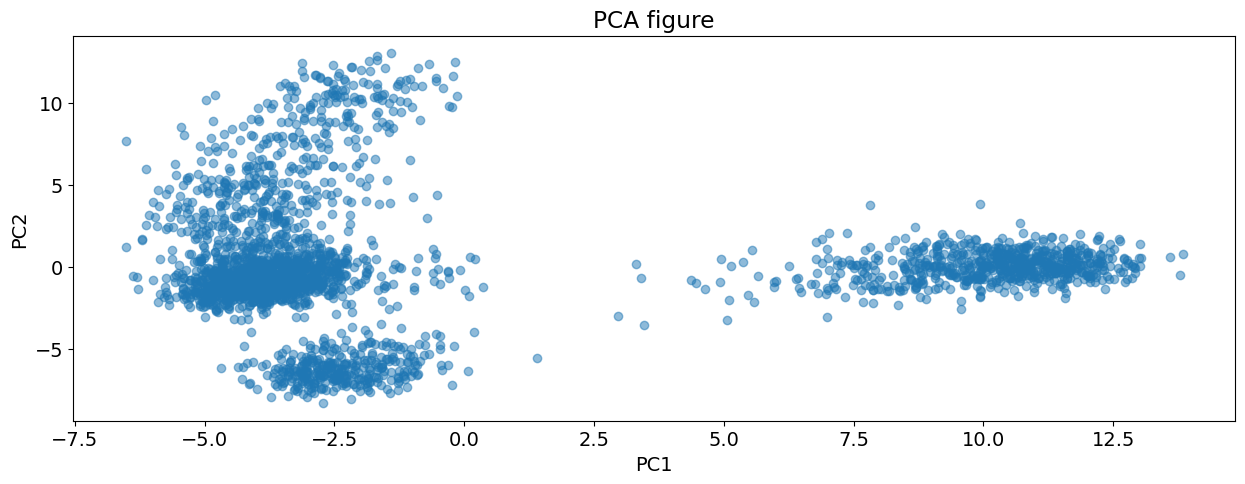

In [9]:
#Plot PC output from PCA
import matplotlib.pyplot as plt
plt.scatter(A_pca[:,0], A_pca[:,1], alpha=0.5)
plt.title('PCA figure')
plt.xlabel('PC1')
plt.ylabel('PC2') 

### 2b-2. Dimensionality Reduction with UMAP

Now that we have run UMAP dimensionality reduction on our transformed data, we can visualize its output by plotting the first two dimensions of its projection on the x- and y-axis of our plot, respectively. Given the Python indexing logic applied for your previous plotting exercise, and the documentation of the [UMAP function](https://umap-learn.readthedocs.io/en/latest/plotting.html) and the [scatter function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html), determine the correct x- and y- inputs for the scatter plot indicated by ???.

In [10]:
import umap
reducer = umap.UMAP()
reducer.fit(A_log)
A_UMAP = reducer.transform(A_log)
assert(np.all(A_UMAP == reducer.embedding_))

/Users/lia/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
A_UMAP.shape

(2638, 2)

In [12]:
type(A_UMAP)

numpy.ndarray

/var/folders/9h/cj_n43pd12n4chtlybw68l5c0000gs/T/ipykernel_85603/2285123488.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(A_UMAP[:,0], A_UMAP[:,1], cmap='Spectral', s=5)


Text(0, 0.5, 'UMAP2')

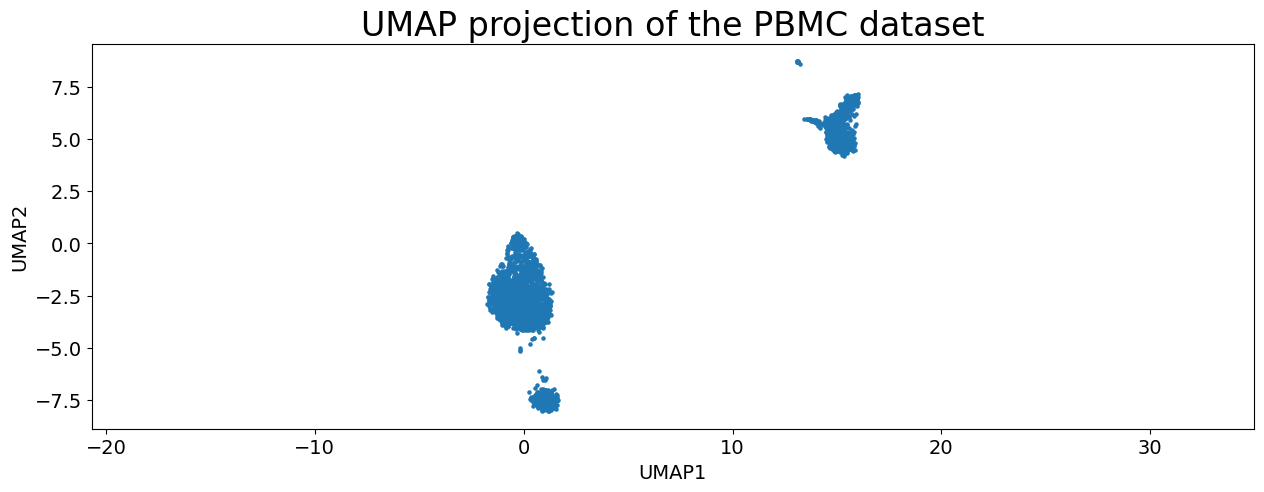

In [14]:
#Plot 2D UMAP projection
plt.scatter(A_UMAP[:,0], A_UMAP[:,1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the PBMC dataset', fontsize=24);
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')


### 2c. Using k-Means to Cluster Cells

Finally, let's run a [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method to group the observations into clusters based on their gene expression profiles.

First, define how many clusters we should group this data into. Hint: How many PBMC cell types are there?

In [15]:
#Using Kmeans clustering to group cells into clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 3 , max_iter=10000)
kmeans.fit(A_pca)
cluster_labels = kmeans.predict(A_pca)

/Users/lia/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
type(cluster_labels)

numpy.ndarray

Now that we have given every cell in our dataset a cluster assignment, we can overlay them onto the positions of our cells on the UMAP scatter plot you generated previously. 

*Note that the missing portion of code in the line plt.scatter(???, ???, c=cluster_labels, cmap='viridis', alpha=0.5) should match the x- and y- axis of your completed 2D UMAP projection plot.*

Text(0, 0.5, 'UMAP2')

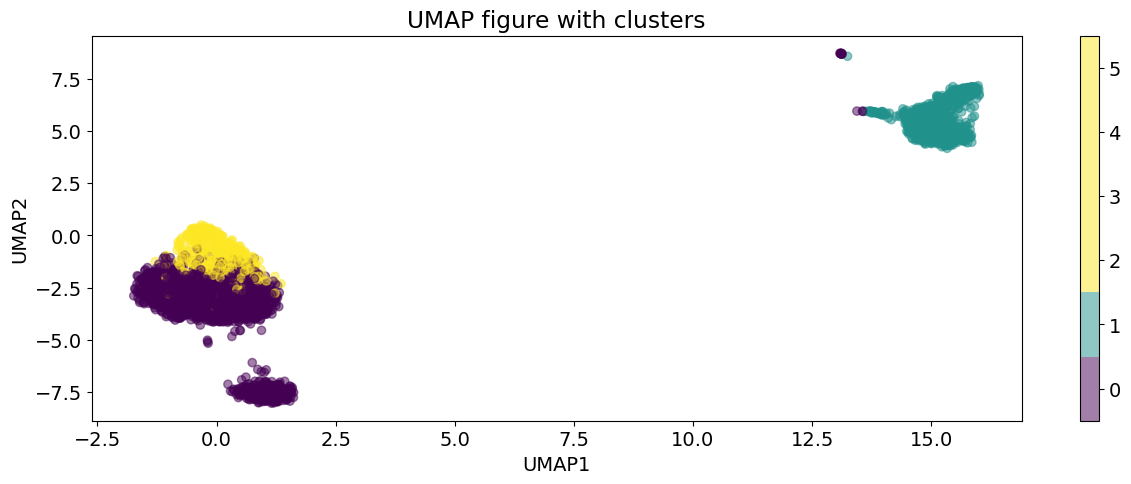

In [17]:
#Overlaying cluster identity to cell position on UMAP plot
plt.scatter(A_UMAP[:,0], A_UMAP[:,1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.colorbar(boundaries=np.arange(7)-0.5,cmap='viridis', alpha=0.5).set_ticks(np.arange(6))
plt.title('UMAP figure with clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

### 2d. Find marker genes for each cluster
(see R Markdown code)